# Como rodar o código

**Não é necessário rodar o código**, visto que o google colab guarda as respostas da última vez que rodou. Todavia, caso queira fazer isso, indico que as partes cinzas são linhas de códigos que devem ser ativadas sequencialmente de cima para baixo.

Para ativar:
*   Click no canto superior esquerdo de cada bloco de código,no símbolo --> [        ]
*   Espere o código terminar de rodar.


Aviso que como alguns modelos são baseados em inicializacões aleátorias pode haver uma pequena variação da precisão do sistema de predição final.

# Importando as bibliotecas

Importei as bibliotecas que serão utilizadas e a versão do tensorflow que usei foi 2.1.0.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.1.0'

# Importando a base de dados


Por favor, **importe o dataset** referente ao processo seletivo,caso queira rodar o código : Mission_Prediction_Dataset

Passos a seguir:

*  Leve o mouse para o canto superior esquerdo.
*  Você verá uma sequência de simbolos.
*  Click no ultimo que possui o formato de uma pasta.
*  Logo, na parte direita aparecerá a palavra upload.
*  Click em cima da palavra.
*  Nesse aspecto, busque o diretório em que se encontra o arquivo: Mission_Prediction_Dataset.csv
*   Click nele.
*   Pressione o botão abrir.


In [0]:
dados = pd.read_csv('/content/Mission_Prediction_Dataset.csv')


**Contextualizando o problema**

*   O dataset é referente a características de indivíduos que podem ou não ter doenças cardiacas.
*   A princípio a única informação que possuímos é que a coluna 14 diz respeito a tal condição.
*   Logo,
0.    A pessoa não tem a doença
1.    A pessoa tem a doença
*   O objetivo é com base nesses dados criar um sistema preditivo para tal condição.







In [0]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
column1     303 non-null int64
column2     303 non-null int64
column3     303 non-null int64
column4     303 non-null int64
column5     303 non-null int64
column6     303 non-null int64
column7     303 non-null int64
column8     303 non-null int64
column9     303 non-null int64
column10    303 non-null float64
column11    303 non-null int64
column12    303 non-null int64
column13    303 non-null int64
column14    303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Vemos que são 303 pessoas, sobretudo que 13 dados são inteiros e 1 é real, logo possivelmente necessitaram de algum tratamento.

# Visualização da base de dados

Iremos ver a base de dados e se necessário aplicaremos no próximo tópico os tratamentos necessário.

In [0]:
dados.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Vemos que alguns parâmetros estão na forma label encoding, isto é, observe o parâmetro da 2º coluna. Ele pode assumir os valores 0 ou 1, porém isso pode criar um viés nos modelos ou criar uma performance aquém do esperado, portanto irei transforma-los para forma one-hot-enconding, ou seja, se os valores esperados do parâmetro são 0 e 1, eu irei criar 2 parametros, sendo que o primeiro representará o 0 e o segundo o 1.

> Por exemplo:


*   0 --> 1 0
*   1 --> 0 1





---



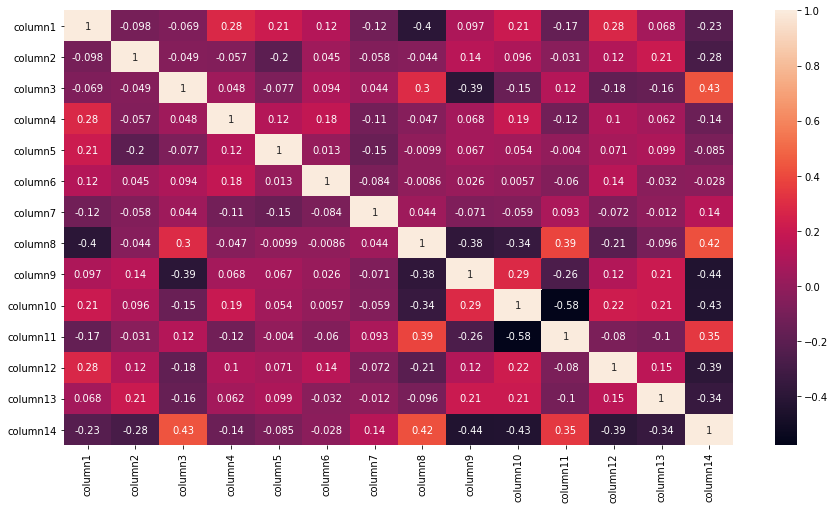

In [0]:
plt.subplots(figsize=(15, 8))  
sns.heatmap(dados.corr(), annot = True  );

Nesse momento, estou avaliando a correlação das colunas, nessa percepção vemos que o 9º parâmetro possui 44% de correlação se a pessoa irá ou não ter doença cardiaca, ou seja, é um indicador moderado. Assim, tem-se mais um motivo para transformá-lo de label encoding para one-hot-encoding.

E vemos um fato que pode diminuir a eficiência dos modelos que irei adotar, o 10º parâmetro tem uma correlação muito alta com o 11º, ao passo que ambos possuem correlação moderada com a presença ou não de doença, assim farei um tratamento na próxima seção para obter uma única coluna de dados proveniente dessas 2 colunas, para diminuirmos a depêndencias entre as váriaveis de teste.

Uma vez que o problema foi dado de forma implícita, eu não irei analisar a veracidade ou possíveis viés criados por alguns parâmetros. Assim , vale ressaltar, somente, que ao pesquisar notei que a coluna 3 diz correlação com dor no peito. Todavia, pense comigo, por exemplo, se eu tivesse analisando um sistema preditivo para pneumonia, faz sentido eu colocar a frequência que a pessoa toma antbiótico, sendo que essa característica é uma consequência da pneumonia. Nesse aspecto, acho que a dor no peito seria mais uma consequência do que causa.

# Tratamento das bases de dados

**Primeiramente, irei fazer um tratamento na 10º coluna com a 11º.**

Visto que elas possuem uma correlação quase dita como 'forte'

In [0]:
k = dados[['column10', 'column11']]
k.head()

,column10,column11
0,2.3,0
1,3.5,0
2,1.4,2
3,0.8,2
4,0.6,2


O metodo aplicado para o tratamendo desses dados será o PCA(Principal Component Analisy), pois diminuir 1 coluna acarretará em perda de informação, logo com o PCA irei transformar a base das 2 colunas, numa base que a primeira coluna apresente a maior quantidade de informação possível.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Estou importando as duas biblioteca que irei utilizar para tal tratamento.

In [0]:
scaler = StandardScaler()
scaler.fit(k)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data = scaler.transform(k)
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

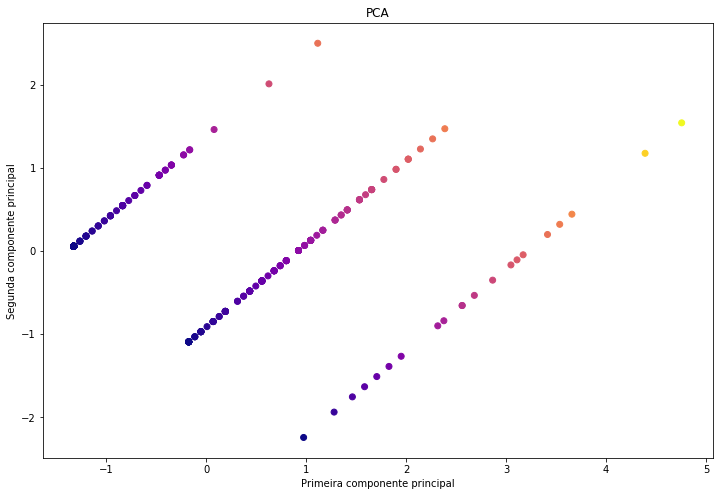

In [0]:
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=dados['column10'], cmap='plasma')
plt.title('PCA')
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal');

In [0]:
pca.explained_variance_ratio_

array([0.78876841, 0.21123159])

A primeira componente explica 78,8% do conjunto de dados. Então irei pega-la como substituto para coluna 10 e 11.

In [0]:
r = pd.DataFrame(x_pca)

In [0]:
r.head()

,0,1
0,2.377234,-0.839506
1,3.109256,-0.107484
2,-0.470537,0.910233
3,-0.836548,0.544223
4,-0.958551,0.422219


In [0]:
m = r.iloc[:, :-1].values
m = pd.DataFrame(m)

In [0]:
m.head()

,0
0,2.377234
1,3.109256
2,-0.470537
3,-0.836548
4,-0.958551




---



**Agora faremos o tratamento das colunas em label encoding**

Como eu disse, colunas em label encoding , normalmente, criam modelos menos eficientes do que em one hot encoding. Logo, irei tratá-las agora.

In [0]:
dados.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


As colunas em label encoding são:
*   column2
*   column3
*   column6	
*   column7
*   column9
*   column12
*   column13











Lembra-se que a coluna 11 estava em label encoding, todavia foi tratada com a coluna 10 e que a ultima coluna é um binário que caracteriza ou não a ocorrência da doença.

In [0]:
p = dados [['column2', 'column3', 'column6', 'column7', 'column9','column12','column13']]
p.head()

,column2,column3,column6,column7,column9,column12,column13
0,1,3,1,0,0,0,1
1,1,2,0,1,0,0,2
2,0,1,0,0,0,0,2
3,1,1,0,1,0,0,2
4,0,0,0,1,1,0,2


Como voçê pode ver, só há parâmetros na forma label encoding

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
q = onehotencoder.fit_transform(p).toarray()

Essa função transforma de label para one hot encoder, mas a apresenta como um vetor

In [0]:
q = pd.DataFrame(q)
q.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Então, conclui-se que 7 parâmetros foram transformados em 21.


---



In [0]:
n = dados [['column1', 'column4', 'column5', 'column8', 'column14']]
n.head()

,column1,column4,column5,column8,column14
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1


Aqui possuímos os dados que não foram tratados.

Agora irei concatenar todos os parâmetros novamente.

In [0]:
a = pd.concat([m, q], axis = 1)
a = pd.concat([a,n], axis = 1)
x = a.iloc[:, :-1].values
y = a.iloc[:,-1:].values

In [0]:
x[0]

array([  2.37723407,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,  63.        ,
       145.        , 233.        , 150.        ])

Já passei para forma de vetor que será a usada na próxima sessão, só queria dar um adendo que temos 27 parametros para a predição. Assim para cada modelo serão 27 entradas e 1 saida.

# Divisão Base de treinamento X Base de teste

Nessa secção irei dividir uma parte dos dados para o treinamento, ao passo que o restante será usado para válida nosso modelo sobre a característica de accurancy, isto é o quão confiável ele é para afirmar se uma pessoa terá ou não a doença.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Seguindo os requisitos dividi a base em 70% para treinamento e 30% para teste, além de ter colocado o random_state no valor 42.

In [0]:
x_train.shape

(212, 27)

Assim possuímos 212 dados para o treinamento dos modelos.

In [0]:
x_test.shape

(91, 27)

E 91 dados para o teste.

# Construção e treinamento do modelo: NeuralNetwork/MLP

Primeiro modelo que utilizaremos são as redes neurais.



In [0]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 16, activation='relu', input_shape=(27,)))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.Dense(units = 32, activation='relu', input_shape=(30,)))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.Dense(units=16, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

As redes neurais buscam simular o funcionamento do cerébro humano, nesse aspecto podemos dividir seu funcionamento, de forma simplificada em:
*   **Input**: São os parâmetros de entrada, esses são conectados a toda uma primeira camada de neurónios. Assim cada neurónio receberá a soma dos valores associados aos parâmetros, contudo cada valor é multiplicado por um valor chamado de peso, que é determinado durante o treinamento.
*   **Camadas ocultas**: São ligações de neurônios com neurônios, funcionando de forma análoga, mas dessa vez os neurônios da camada (n-1) funcionando como input para camada (n)
*   **Output**: É a ultima camada de neurônios que liga nos parâmetros de saida.





In [0]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                448       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

Como podemos ver, possuímos:
3 camadas ocultas, sendo 2 com 16 neurônios e 1 com 32.

*   27 parâmetros de input.
*   3 camadas ocultas, sendo 2 com 16 neurônios e 1 com 32.
*   1 parâmetro de output.



Nesse aspecto, o total de variáveis(pesos) são 1537.

In [0]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics= ['accuracy'])

Aqui eu ofereço minhas condições de teste da rede neural. Primeiramente, quando a rede neural é inicializada seus pesos são aleatórios, assim os dados de treinamento são inseridos e ela dará uma resposta. Nesse campo, para a evolução da rede calculamos um erro associado comparando o valor real com o valor predito pela rede. Eu estou usando a forma de calcular erro binary_crossentropy.
E para ver o desempenho da rede adicionei a metrica de accuracy que é o quanto ela é confiável dentro da minha base de treinamento.

Vale ressaltar, que para evitar mínimos locais e overfitting da rede neural, eu usei a função dropout para resetar alguns pesos a cada treino, além de que eu resolvi fazer de forma de forma estócastica, fazendo a rede calcular recorrente vezes o erro numa geração, dividindo a minha base de treinamento em grupos de 5 pessoas.

Logo em seguida, escolho que minha rede irá treinar por 500 gerações, isto é, numa geração a cada 5 pessoas ela faz os seguintes passos:
*   Adiciona um grupo para o treino.
*   Compara o erro entre os indivíduos do grupo.
*   Ajusta os pesos.


In [0]:
epochs_hist = classifier.fit(x_train, y_train, epochs = 500, batch_size= 5  ) 

Train on 212 samples
Epoch 1/500
212/212 [==============================] - 1s 3ms/sample - loss: 6.9234 - accuracy: 0.4953
Epoch 2/500
212/212 [==============================] - 0s 425us/sample - loss: 4.2223 - accuracy: 0.5000
Epoch 3/500
212/212 [==============================] - 0s 436us/sample - loss: 4.2479 - accuracy: 0.4811
Epoch 4/500
212/212 [==============================] - 0s 445us/sample - loss: 2.8000 - accuracy: 0.5094
Epoch 5/500
212/212 [==============================] - 0s 455us/sample - loss: 1.8915 - accuracy: 0.5755
Epoch 6/500
212/212 [==============================] - 0s 439us/sample - loss: 1.7803 - accuracy: 0.5330
Epoch 7/500
212/212 [==============================] - 0s 471us/sample - loss: 1.5098 - accuracy: 0.5377
Epoch 8/500
212/212 [==============================] - 0s 535us/sample - loss: 1.5582 - accuracy: 0.5330
Epoch 9/500
212/212 [==============================] - 0s 465us/sample - loss: 1.2274 - accuracy: 0.5755
Epoch 10/500
212/212 [==============

**Avaliação do modelo quanto ao treinamento:**

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
mlp_pred_train = classifier.predict(x_train)
mlp_pred_train[0:10]

array([[0.99989843],
       [0.99999464],
       [0.990249  ],
       [0.6955761 ],
       [0.99974805],
       [0.82379013],
       [0.72313744],
       [0.9956447 ],
       [0.00269042],
       [0.59161335]], dtype=float32)

Aqui temos os valores oferecidos pela nossa rede neural. Que não valem nada para nós da maneira que se encontram. Portanto, eu farei uma transformação simples. Se o valor for maior que 0.5 o modelo dará que a pessoa tem a doença caso contrário ela não terá.

In [0]:
mlp_pred_train = (mlp_pred_train > 0.5)
mlp_pred_train[0:10]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True]])

Agora iremos comparar o valor preditivo com o real.

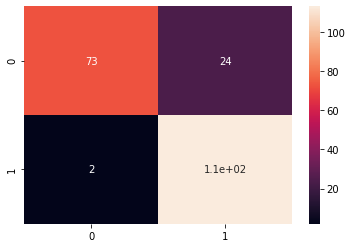

In [0]:
cm = confusion_matrix(y_train, mlp_pred_train)
sns.heatmap(cm, annot=True);

Explicando a matriz 2x2:

*   Canto superior esquerdo: Verdadeiro Positivo(A pessoa tem doença)
*   Canto superior direito: Falso Positivo(A Pessoa não tem doença, mas o modelo diz que tem)
*   Canto inferior esquerdo: Falso Negatico(A pessoa tem a doença,mas o modelo diz que ela não tem)
*   Canto inferior direito: Verdadeiro Negativo(A pessoa não tem doença)



Nesse aspecto, calculamos a accuracy no modelo de treinamento com base no quanto ela acertou sobre o total. Logo, a accuracy é de 87,6%

In [0]:
print(classification_report(y_train, mlp_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85        97
           1       0.82      0.98      0.90       115

    accuracy                           0.88       212
   macro avg       0.90      0.87      0.87       212
weighted avg       0.89      0.88      0.87       212



#Construção e treinamento do modelo:DecisionTree/RandomForest

Segundo modelo que utilizaremos são as florestas de árvores de decisões.

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

A floresta de árvores é um modelo que coleta informação de diversas árvores de decisão, no nosso caso usei 500.

A árvore de decisão é como se fosse um mapa dos possíveis resultados de uma série de escolhas relacionadas. Assim, a árvore inicia com um nó, e divide os resultados criando nós, que se ramificam em outras possibilidades.

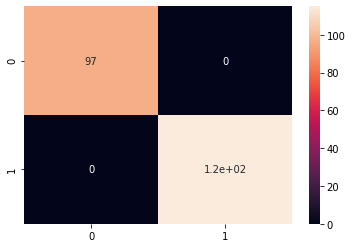

In [0]:
rfc_pred_train = rfc.predict(x_train)
km = confusion_matrix(y_train,rfc_pred_train)
sns.heatmap(km, annot=True)

Vemos que a accuracy é de 100%, sendo que isso nem sempre significa que o modelo está perfeito, posto que pode acontecer de haver overfitting, isto é o modelo se viciar de mais na base de treinamento sendo ineficaz para prever novos resultados

In [0]:
print(classification_report(y_train, rfc_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



# Construção e treinamento do modelo:SVMs

O terceiro modelo é o SVMs

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 0.5, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=3 )
grid.fit(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.5, gamma=0.001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.5, gamma=0.001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.5, gamma=0.001, kernel=rbf, score=0.619, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.5, gamma=0.001, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........... C=10, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.548, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.628, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.605, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.619, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.524, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.595, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.767, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.767, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.738, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.738, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.643, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was exp

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

Irei me abster da explicação de como funciona o SVM, visto que foge do escopo do nosso objetivo, pois sua metodologia utiliza conceítos de Algebra vetorial avançado. Assim, irei fazer uma analogia simples , para um breve entendimento do modelo.

Pense que estou no espaço 2D. Assim, nesse local se encontram um conjuto de bolas vermelhas(pontos do tipo 1) com um envoltório de bolas azuis(pontos do tipo 2). Nesse caso a pergunta fica meio filosófica, pois estamos no espaço 2D, mas existe algum plano que consiga separar os 2 conjuntos de pontos?

A reposta é não para tal dimensão, mas imagine agora que fazemos uma transformação linear do tip (x,y) ---> (x,y,x²+y²). Iremos criar um paraboloíde 3D, e ajustando-o de forma aceitável, os pontos vermelhos ficaram na parte inferior e os pontos azuis na parte superior, assim conseguimos um plano que passe pelo paraboloíde. Dessa maneira, fazemos uma transformação do R3 para o R2. E nesse sentido obteremos no nosso caso uma elipse/círculo.

Agora em semelhança básica, o que o SVM faz é análogo, contudo no espaço de n dimensões com um hiper-plano

In [0]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [0]:
svm_pred_train = grid.predict(x_train)

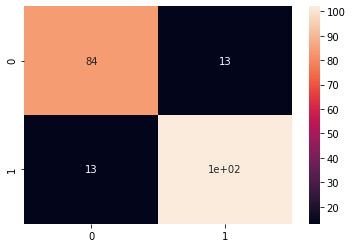

In [0]:
svm = confusion_matrix(y_train,svm_pred_train)
sns.heatmap(svm, annot=True);

Vemos que a accuracy na base de treinamento foi 87.7%

In [0]:
print(classification_report(y_train, svm_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        97
           1       0.89      0.89      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



# Construção e treinamento do modelo:XGBoost

O último modelo é o XGBosst.

In [0]:
from xgboost import XGBClassifier

In [0]:
model = XGBClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

O XGBoost é um poderoso algoritmo que usa o conceito de árvore de decisão, contudo inova ao adicionar a estrutura de "Gradient Boosting", que adiciona técnicas de otimização para o calculo do erro.

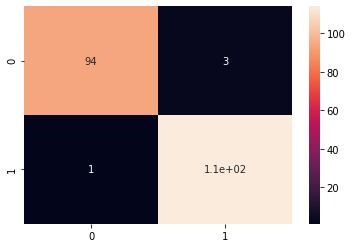

In [0]:
xgb_pred_train = model.predict(x_train)
xgb = confusion_matrix(y_train,xgb_pred_train)
sns.heatmap(xgb, annot=True);

O XGBoost possuiu uma accuracy de 98% sobre a base de treinamento.

In [0]:
print(classification_report(y_train, xgb_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.97      0.99      0.98       115

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



# Avaliacão do modelos

**Avaliação da NeuralNetwork/MLP**

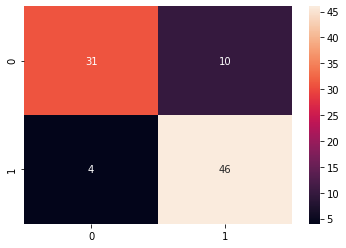

In [0]:
mlp_pred_test = classifier.predict(x_test)
mlp_pred_test = (mlp_pred_test > 0.5)
Neural = confusion_matrix(y_test, mlp_pred_test)
sns.heatmap(Neural, annot=True);

A rede neural apresentou uma accuracy de 84.6%, é importante salientar que a rede neural criou um sistema eficaz pois de 87.6% na base de treinamento sua accuracy só reduziiu em 3%.


In [0]:
print(classification_report(y_test, mlp_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



**Avaliação da DecisionTree/RandomForest**

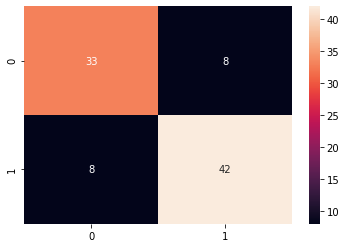

In [0]:
rfc_pred_test = rfc.predict(x_test)
rfc_pred_test = rfc_pred_test == 1
Tree = confusion_matrix(y_test, rfc_pred_test)
sns.heatmap(Tree, annot=True);

A floresta de decisão apresentou uma accuracy de 82,4%, nesse sentido ve-se um claro problema desse modelo, pois ele possui tendência a dar overfitting. Como vemos, a redução na accuracy foi de 17,6%.

In [0]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



**Avaliação da SVMs**



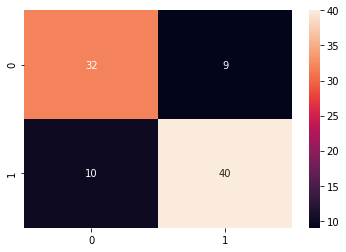

In [0]:
svms_pred_test = grid.predict(x_test)
svms_pred_test = svms_pred_test == 1
svms = confusion_matrix(y_test, svms_pred_test)
sns.heatmap(svms, annot=True);

O SVMs obteve também 79,1%, diferentemente da floresta de decisão tivemos uma redução moderada na precisão, caindo de 87,7%, ou seja, uma redução de 8,6%.

In [0]:
print(classification_report(y_test, svms_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



**Avaliação do XGBoost**

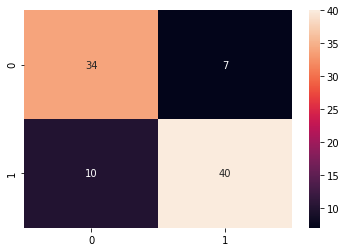

In [0]:
xgb_pred_test = model.predict(x_test)
xgb_pred_test = xgb_pred_test == 1
xgb = confusion_matrix(y_test,xgb_pred_test)
sns.heatmap(xgb, annot=True);

Vemos que o XGBoost sofreu de uma queda acentuada também na accuracy, caindo de 98% na base de treinamento para 81,3% no teste. Assim, uma queda de 16,7%.

In [0]:
print(classification_report(y_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



**Avaliação do modelos em conjunto**

Irei fazer um modelo, que é a unificação da resposta dos 3 modelos de maior accuracy que eu percebi, como as accuracy foram próximas e o modelo é a unificação de somente 3 modelos, não irei fazer média ponderada em relação a accuracy.

In [0]:
mlp_pred_test[0, 0]

False

In [0]:
rfc_pred_test[0]

False

In [0]:
xgb_pred_test[0]

False

Observa_se que os 3 modelos estão na forma de boolean(True/False), logo a pessoa poderá ter a doença se pelo menos 2 modelos indicarem True, ao passo que não terá se pelo menos 2 modelos indicarem False

In [0]:
total_pred_test = []
for i in range(len(mlp_pred_test)):
    total_pred_test.append((mlp_pred_test[i, 0] and rfc_pred_test[i]) or (mlp_pred_test[i, 0] and xgb_pred_test[i]) or (rfc_pred_test[i] and xgb_pred_test[i]))

In [0]:
total_pred_test[0:5]

[False, True, True, False, True]

Está feito, iremos testar a accuracy resultante.

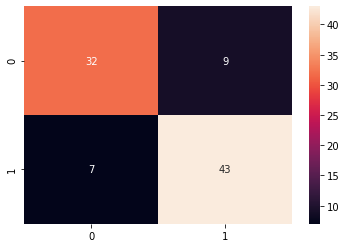

In [0]:
total = confusion_matrix(y_test,total_pred_test)
sns.heatmap(total, annot=True);

Então chegamos numa accuracy de 82,4%, que é um pouco menor que a da rede neural sozinha, ou seja, nesse problema, pode-se identificar que as pessoas que dão erro no teste são , parcialmente, iguais e não distintas.



In [0]:
print(classification_report(y_test, total_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



# Conclusão

A rede neural foi a pior em termos de adaptação na rede de treinamento, contudo foi a que melhor deu respaldo na hora de sua utilização. Mostrando ,assim, que a função dropout e a criação de grupos pequenos forçaram o modelo a se adaptar de forma que não haja overfitting. Além de que, podemos perceber que uma grande accuracy no modelo de treinamento não significa que o modelo é eficiente até que o mesmo seja testado.

**Vimos que com os modelos, exceto o último, nós chegamos a um valor de accuracy próximo na hora de testar, mas por que?**

Iremos desta vez usar o PCA, em toda a base de dados para visualizarmos a distrubuição dos dados diante das 2 componentes de maior variância.

In [0]:
k = dados.iloc[:,:-1]
k.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Estou pegando os dados sem nenhum tratamento, para que nossa possível explicação não tenha interferência da manipulação dos dados que eu fiz.

In [0]:
scaler = StandardScaler()
scaler.fit(k)
scaled_data = scaler.transform(k)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(303, 2)

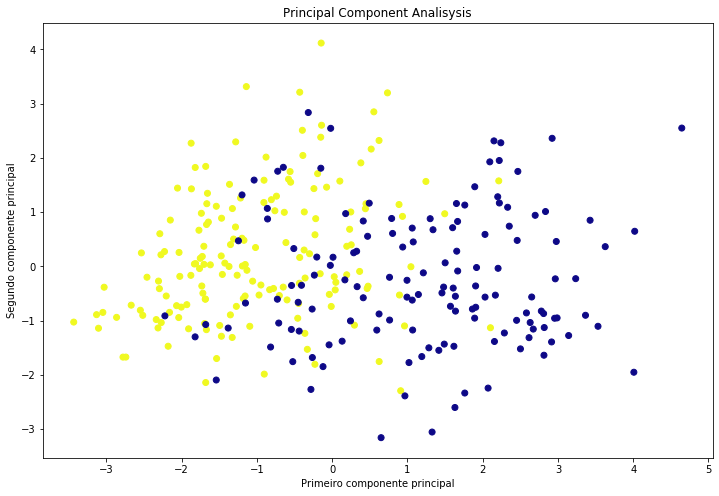

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=dados['column14'], cmap='plasma')
plt.title('Principal Component Analisysis')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal');

In [0]:
pca.explained_variance_ratio_

array([0.21254053, 0.11820708])

Têm-se que as 2 componentes juntas só possuem 33% da variância total do sistema, logo, minha conclusão para fins de calculo pode estar esquivocada, porém olhando para o gráfico vemos que muitos pontos azuis quase tocam/tocam os amarelos e muitos amarelos se aproximam dos azuis. Dessa maneira ve-se que o modelo não consegue avançar muito do que obtemos tendo em vista que existe proximidade de dados opostos. E nosso modelo busca padrões neles, logo podemos concluir que haverá uma imprecisão, mesmo que pequena, devido a fatores naturais.